# 机器学习常用软件包简介

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import seaborn as sns

## EDA

In [2]:
ls ../input/

sample_submission.csv  test.csv               train.csv


In [3]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [4]:
train_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [5]:
test_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

数据说明：https://archive.ics.uci.edu/dataset/1/abalone
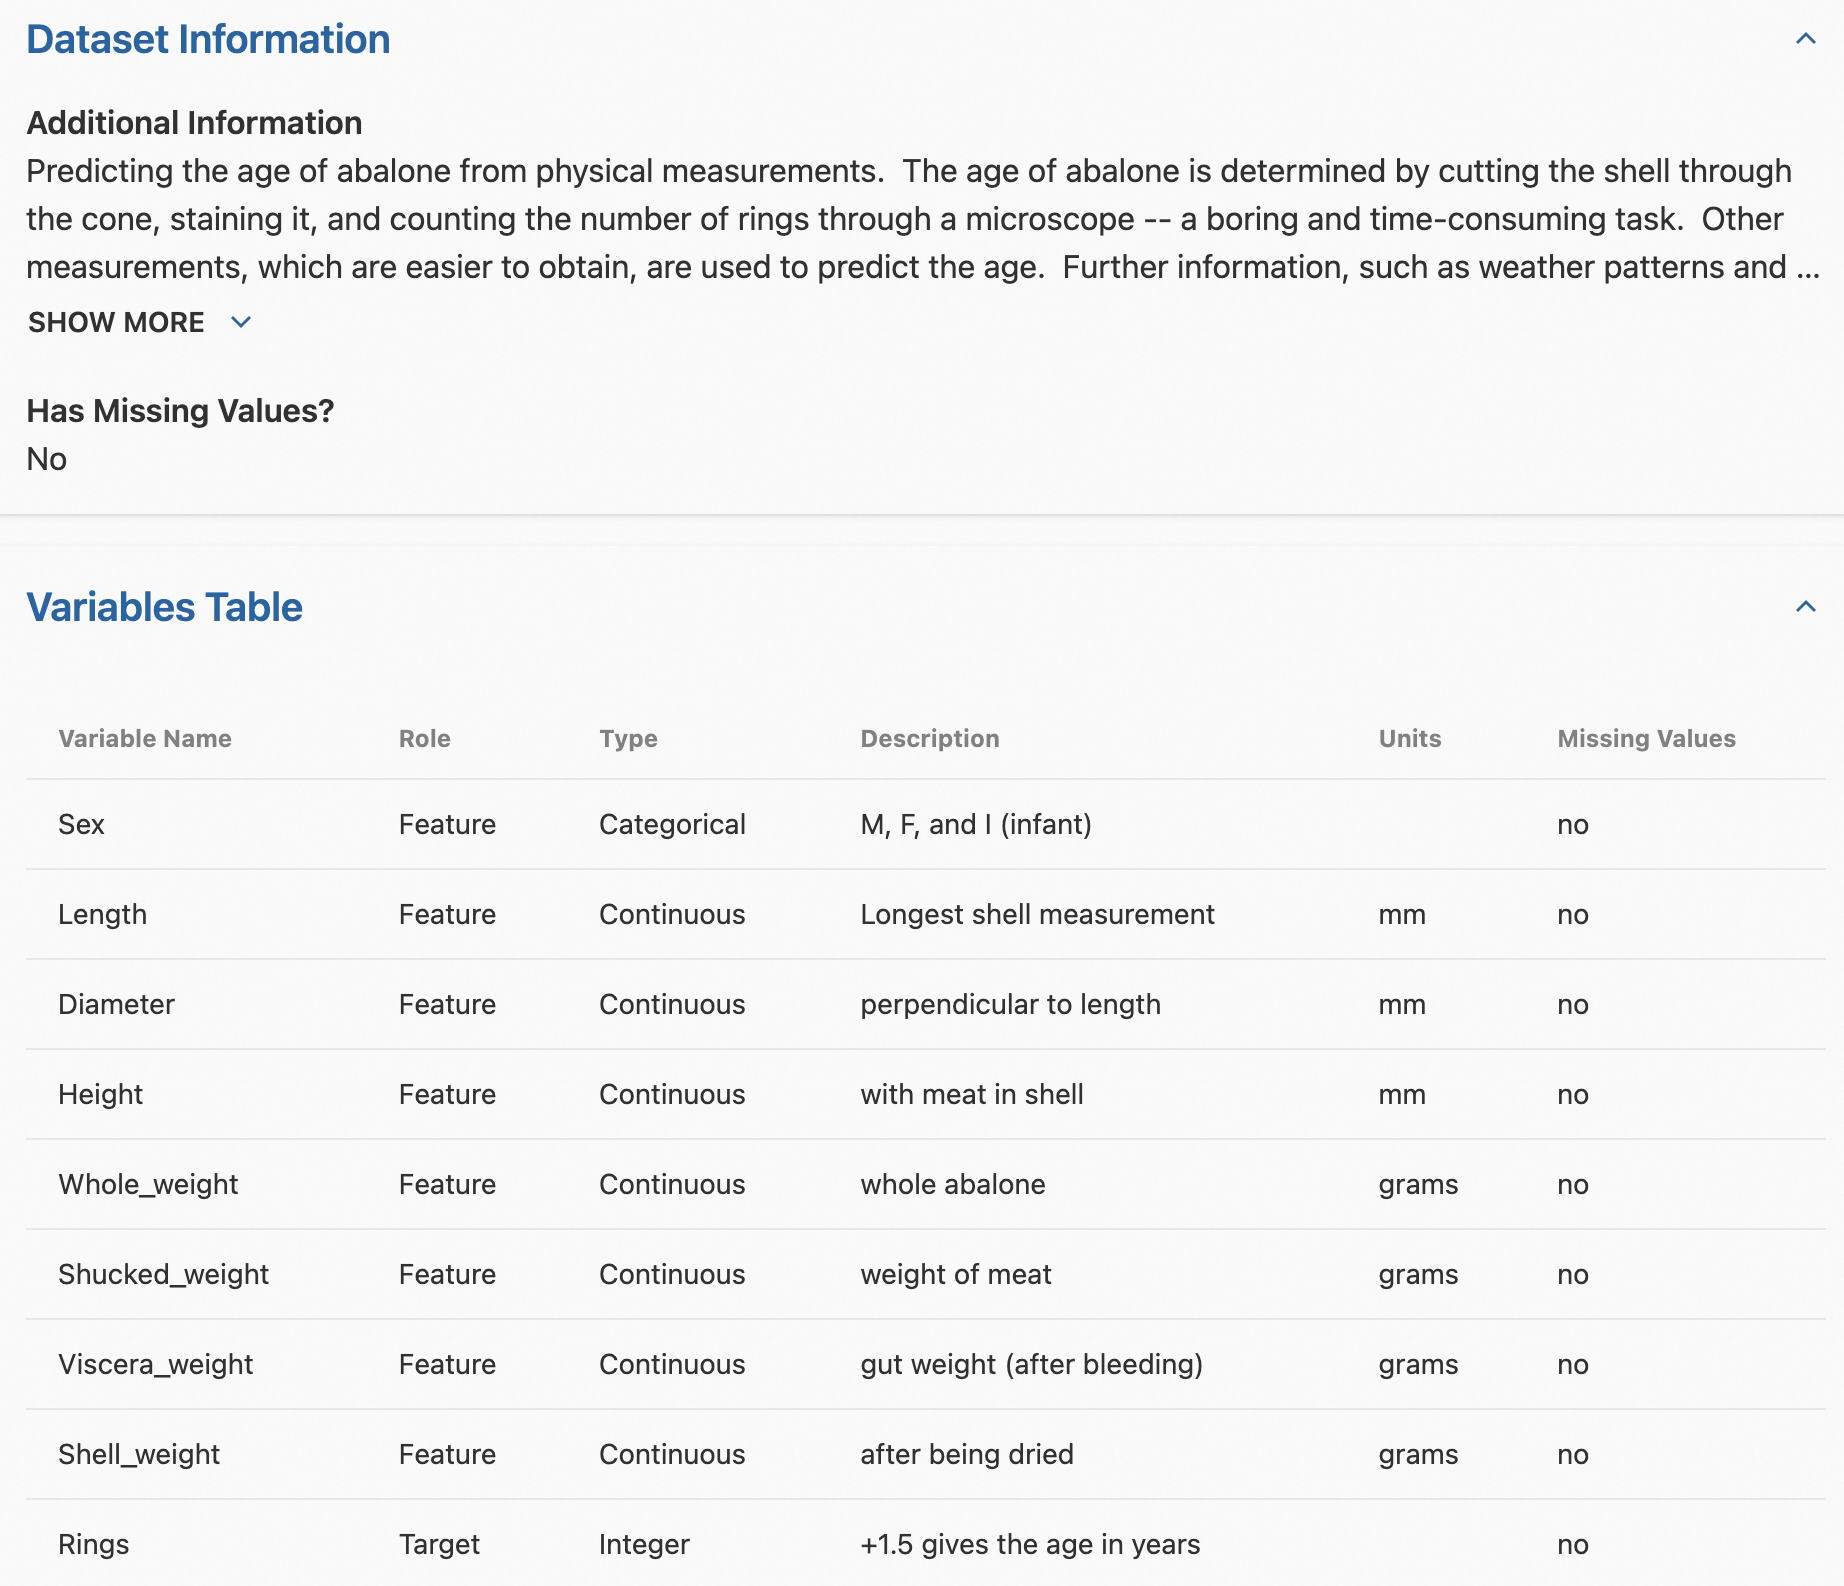

In [6]:
train_df.describe()

id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

### 特征字段

In [8]:
train_df.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [17]:
feat_cols = [c for c in train_df.columns if c not in {'id', 'Sex', 'Rings'}]

In [11]:
cat_feat_cols = ['Sex']

In [29]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 4, 1)
train_df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex')

for i, col in enumerate(feat_cols, start=2):
    plt.subplot(2, 4, i)
    train_df[col].plot(kind='hist')
    plt.title(col)

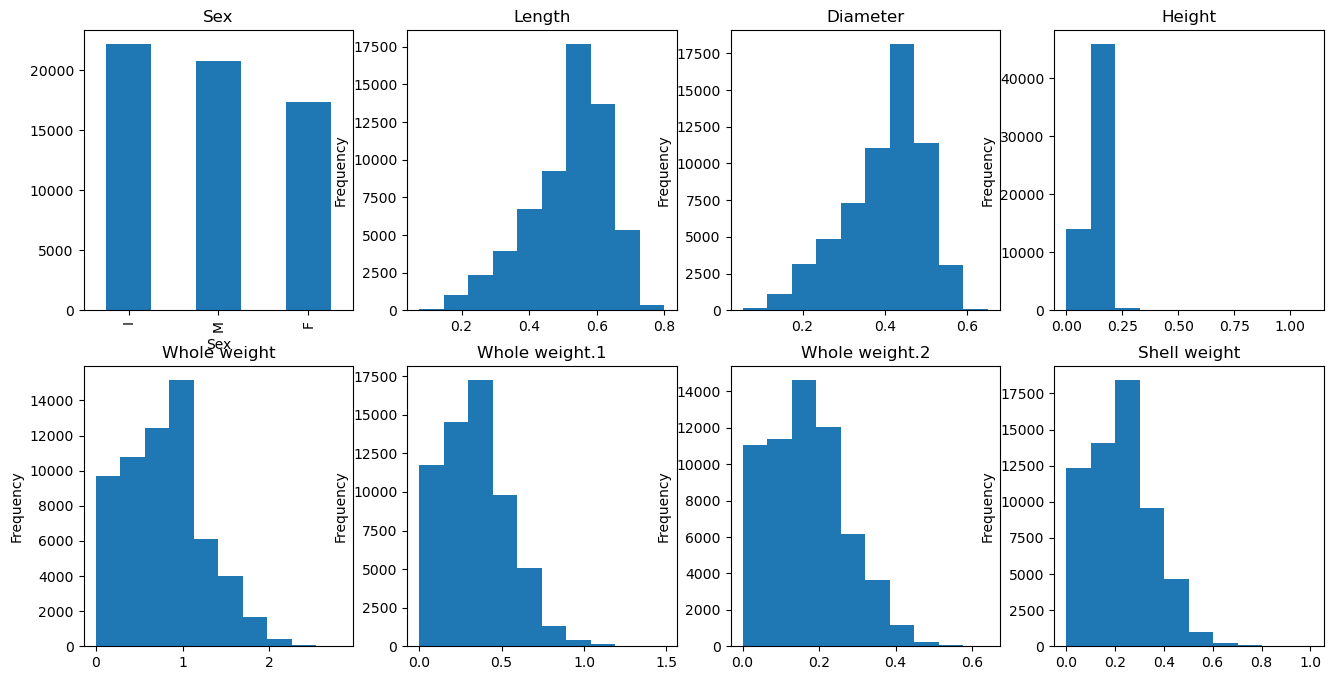

In [30]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 4, 1)
test_df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex')

for i, col in enumerate(feat_cols, start=2):
    plt.subplot(2, 4, i)
    test_df[col].plot(kind='hist')
    plt.title(col)

### target字段

In [32]:
train_df['Rings'].value_counts()

Rings
9     17465
8     14499
10    12464
7      9008
11     8407
6      5411
12     4719
13     4074
5      2862
14     2507
15     2072
16     1439
4      1402
17     1175
18      848
19      639
20      507
3       386
21      255
23      180
22      108
27       41
2        29
24       29
1        25
29       24
25       22
26       18
Name: count, dtype: int64

In [34]:
train_df['Rings'].min(), train_df['Rings'].max(), train_df['Rings'].mean(), len(train_df['Rings'].value_counts())

(1, 29, 9.696794129007339, 28)

target为整数值，考虑后处理的可能

In [31]:
train_df['Rings'].plot(kind='hist')

<Axes: ylabel='Frequency'>

In [37]:
cols = ['Rings'] + feat_cols

In [38]:
sns.pairplot(train_df[cols])

## 评估指标

In [150]:
import math

In [151]:
true_values = [8, 9, 10, 7, 5]
pred_values = [7, 10, 8, 5, 6]

In [152]:
def root_mean_squared_log_error(true_values, pred_values):
    result = 0
    for true, pred in zip(true_values, pred_values):
        result += ( math.log(1 + pred) - math.log(1 + true) ) ** 2
    
    result /= len(true_values)
    result = math.sqrt(result)
    return result

In [153]:
root_mean_squared_log_error(true_values, pred_values)

0.1842547197666245

In [154]:
from sklearn.metrics import mean_squared_log_error

In [155]:
mean_squared_log_error(true_values, pred_values, squared=False)

0.1842547197666245

## 模型

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [76]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.metrics import mean_squared_log_error

- LinearRegression, SVR 需要对数值类特征进行缩放，比如StandardScaler、MinMaxScaler；
- tree-based模型，比如 RandomForest 则不需要

In [61]:
sex_one_hot = pd.get_dummies(train_df['Sex'], dtype=float, prefix='Sex')

In [62]:
sex_one_hot.head()

Sex_F  Sex_I  Sex_M
0    1.0    0.0    0.0
1    1.0    0.0    0.0
2    0.0    1.0    0.0
3    0.0    0.0    1.0
4    0.0    1.0    0.0

In [63]:
train_df = train_df.join(sex_one_hot)

In [64]:
train_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0          0.1465        0.2400     11    1.0    0.0    0.0  
1          0.2765        0.3200     11    1.0    0.0    0.0  
2          0.0030        0.0050      6    0.0    1.0    0.0  
3          0.2055        0.2500     10    0.0    0.0    1.0  
4          0.1600        0.1975      9    0.0    1.0    0.0

In [67]:
std_encoder = StandardScaler()

In [69]:
std_encoder.fit(train_df[feat_cols])

StandardScaler()

In [71]:
feat_std_cols = [f'{c} std' for c in feat_cols]

In [73]:
train_df[feat_std_cols] = std_encoder.transform(train_df[feat_cols])

In [74]:
train_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  Sex_F  Sex_I  Sex_M  Length std  \
0          0.1465        0.2400     11    1.0    0.0    0.0    0.278317   
1          0.2765        0.3200     11    1.0    0.0    0.0    0.955044   
2          0.0030        0.0050      6    0.0    1.0    0.0   -3.020727   
3          0.2055        0.2500     10    0.0    0.0    1.0    0.658976   
4          0.1600        0.1975      9    0.0    1.0    0.0    0.320613   

   Diameter std  Height std  Whole weight std  Whole weight.1 std  \
0      0.288912    0.382451         -0.038314           -0.060061   
1      0.900996    0.250897          0.745005            0.573416   
2     -2.975535   -2.906386         -1.678148           -1.640084   
3      0.747975    0.382451          0.274140            0.169850   
4      0.237905   -0.143763         -0.015371            0.140499   

   Whole weight.2 std  Shell weight std  
0           -0.227155          0.108309  
1            1.061143          0.722736  
2           -1.649238         -1.696570  
3            0.357534          0.185113  
4           -0.093370         -0.218105

In [75]:
x_cols = ['Sex_F', 'Sex_I', 'Sex_M'] + feat_std_cols

In [78]:
trn_idx, dev_idx = train_test_split(train_df.index, test_size=0.2)

In [81]:
X_trn = train_df.loc[trn_idx, x_cols]
X_dev = train_df.loc[dev_idx, x_cols]
y_trn = train_df.loc[trn_idx, 'Rings']
y_dev = train_df.loc[dev_idx, 'Rings']

### 线性回归

In [82]:
lr_model = LinearRegression()

In [84]:
lr_model.fit(X_trn, y_trn)

LinearRegression()

In [85]:
lr_model_pred = lr_model.predict(X_dev)

In [90]:
lr_model_pred.min(), lr_model_pred.max()

(-1.1821708679199219, 27.247584342956543)

In [93]:
lr_model_pred[lr_model_pred < 0] = 0

In [120]:
mean_squared_log_error(y_dev, lr_model_pred, squared=False)

0.16616860170444994

### SVM

In [95]:
svm_model = SVR()

In [96]:
svm_model.fit(X_trn, y_trn)

SVR()

In [97]:
svm_model_pred = svm_model.predict(X_dev)

In [98]:
svm_model_pred.min(), svm_model_pred.max()

(3.8878915439425707, 21.135151179631556)

In [99]:
svm_model_pred[svm_model_pred < 0] = 0

In [121]:
mean_squared_log_error(y_dev, svm_model_pred, squared=False)

0.15566697277968278

### RF

In [109]:
rf_model = RandomForestRegressor(n_estimators=1000)

In [110]:
rf_model.fit(X_trn, y_trn)

RandomForestRegressor(n_estimators=1000)

In [111]:
rf_model_pred = rf_model.predict(X_dev)

In [112]:
rf_model_pred.min(), rf_model_pred.max()

(3.224, 20.956)

In [113]:
rf_model_pred[rf_model_pred < 0] = 0

In [122]:
mean_squared_log_error(y_dev, rf_model_pred, squared=False)

0.15572386048630418

### LightGBM

In [115]:
import lightgbm as lgb

In [117]:
params = {
    'num_threads': 11,
    'objective': 'regression',
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'lambda_l1': 1,
    'metric': 'l2',
    'early_stopping_rounds': 400,
}

In [118]:
trn_data = lgb.Dataset(X_trn, label=y_trn)
val_data = lgb.Dataset(X_dev, label=y_dev)

lgb_model = lgb.train(params, trn_data, 10000, valid_sets=val_data, callbacks=[lgb.log_evaluation(100)])

lgb_model_pred = lgb_model.predict(X_dev, num_iteration=lgb_model.best_iteration)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 72492, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 9.682227
Training until validation scores don't improve for 400 rounds
[100]	valid_0's l2: 3.50908
[200]	valid_0's l2: 3.47831
[300]	valid_0's l2: 3.4709
[400]	valid_0's l2: 3.47671
[500]	valid_0's l2: 3.48244
[600]	valid_0's l2: 3.49115
[700]	valid_0's l2: 3.49884
Early stopping, best iteration is:
[307]	valid_0's l2: 3.46961


In [123]:
mean_squared_log_error(y_dev, lgb_model_pred, squared=False)

0.151739513361574

## 预测&生成提交文件

In [81]:
X_trn = train_df.loc[trn_idx, x_cols]
X_dev = train_df.loc[dev_idx, x_cols]
y_trn = train_df.loc[trn_idx, 'Rings']
y_dev = train_df.loc[dev_idx, 'Rings']

In [137]:
trn_data = lgb.Dataset(train_df[x_cols], label=train_df['Rings'])

lgb_model = lgb.train(params, trn_data, 300, valid_sets=trn_data, callbacks=[lgb.log_evaluation(100)])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 90615, number of used features: 10
[LightGBM] [Info] Start training from score 9.696794


/Users/jiazhuang/opt/miniconda3/envs/py3.12/lib/python3.12/site-packages/lightgbm/callback.py:294: UserWarning: Only training set found, disabling early stopping.
  _log_warning('Only training set found, disabling early stopping.')


[100]	training's l2: 3.1746
[200]	training's l2: 2.97604
[300]	training's l2: 2.83297


In [138]:
x_cols

['Sex_F',
 'Sex_I',
 'Sex_M',
 'Length std',
 'Diameter std',
 'Height std',
 'Whole weight std',
 'Whole weight.1 std',
 'Whole weight.2 std',
 'Shell weight std']

In [139]:
test_sex_one_hot = pd.get_dummies(test_df['Sex'], dtype=float, prefix='Sex')

In [140]:
test_df = test_df.join(test_sex_one_hot)

In [141]:
test_df[feat_std_cols] = std_encoder.transform(test_df[feat_cols])

In [143]:
test_df['Rings'] = lgb_model.predict(test_df[x_cols])

In [144]:
test_df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_F  Sex_I  Sex_M  Length std  \
0          0.3125        0.3005    0.0    0.0    1.0    1.081931   
1          0.2195        0.2750    0.0    0.0    1.0    0.532090   
2          0.1845        0.2405    0.0    0.0    1.0    0.362908   
3          0.1865        0.2350    0.0    0.0    1.0    0.447499   
4          0.0670        0.1050    0.0    1.0    0.0   -0.863660   

   Diameter std  Height std  Whole weight std  Whole weight.1 std  \
0      0.747975    0.514004          0.980984            1.358536   
1      0.594954    0.645558          0.423812            0.673696   
2      0.186898    0.119344          0.110266            0.057340   
3      0.900996    0.250897          0.185648            0.057340   
4     -0.782235   -0.669977         -0.941807           -0.896544   

   Whole weight.2 std  Shell weight std      Rings  
0            1.417902          0.572970   9.831458  
1            0.496274          0.377121   9.861854  
2            0.149424          0.112149   9.967641  
3            0.169244          0.069908  10.425049  
4           -1.014999         -0.928536   7.581784

In [146]:
test_df[['id', 'Rings']].to_csv('lgb_iter300_lcv1517.csv', index=False, header=True)

In [147]:
!head lgb_iter300_lcv1517.csv

id,Rings
90615,9.83145813930132
90616,9.861853806759253
90617,9.967641258915059
90618,10.425048909738456
90619,7.581783632682358
90620,9.359906273295103
90621,11.237910277995875
90622,6.289198321408187
90623,7.998895173486973


In [149]:
!kaggle competitions submit -c playground-series-s4e4 -f lgb_iter300_lcv1517.csv -m "feat std, lgb iter300"

  0%|                                               | 0.00/1.45M [00:00<?, ?B/s]^C
  0%|                                               | 0.00/1.45M [00:11<?, ?B/s]
User cancelled operation


**public leaderboard: 0.14805**

## 下一步优化方向
- 本地交叉验证
- 更强大的模型，适当调优
- 特征工程
- 模型融合
- 引入更多的训练数据
- ...